[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Features Transform case1

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 16/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0037FeaturesTransform.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.svm import SVC

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotBinaryClassData, PlotDecisionBoundaryClosure


In [5]:
# General Auxiliary Functions


## Feature Engineering

Feature Engineering is the _art of classic machine learning_.   
Given that most models are known to all, the _feature engineering_ step is the one most important along with the hyper parameter optimization.

It mostly composed of:

 -  Feature Transform / Extraction  
    Applying operators to generate additional features out of the given features.  
    The operations can be: Polynomial, Statistical, Normalization, Change of Coordinates, etc...
 -  Dimensionality Reduction  
    A specific case of transform which reduce the number of features to maximize the inner structure of the data. 
 -  Feature Selection  
    A specific case of dimensionality reduction where only a sub set of the features are used.  
    They are selected by statistical tests or closed loop evaluation.

Some also include _Pre Process_ steps as handling missing data and outlier rejection as part of the _feature engineering_ step.

The motivation of a specific processing is a result of:

1.  Domain Knowledge  
    The knowledge about the origins and the domain of data.  
    For instance, if one works on RF Data, analyzing the Fourier Domain features is a _domain knowledge_.
2.  AutoML  
    Building a loop which evaluates the hyper parameters of the feature engineering steps to maximize the score.  
    Commonly some automated feature generators are incorporated into the loop.

![](https://i.stack.imgur.com/4uPUo.png)

Some domains have their own specific approaches. For instance, in _Time Series Forecasting_ there are methods which assists with dealing with the periodicity of the data.  

* <font color='brown'>(**#**)</font> See [Data Science - List of Feature Engineering Techniques](https://datascience.stackexchange.com/questions/12984).
* <font color='brown'>(**#**)</font> See [Data Science - Tools for Feature Engineering](https://datascience.stackexchange.com/questions/8286).
* <font color='brown'>(**#**)</font> See [SciKit Learn's Time Related Feature Engineering](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html).
* <font color='brown'>(**#**)</font> [FeatureTools](https://github.com/alteryx/featuretools) is a well known tool for feature generation.

### Kernel SVM by Feature Transform

In this notebook we'll imitate the effect of the _Kernel Trick_ using features transform.  
We'll use a _XOR Data Set_, where data are located in the 4 quadrants of the $\mathbb{R}^{2}$ space.

* <font color='brown'>(**#**)</font> Some useful tutorials on Feature Engineering are given in: [Feature Engine](https://github.com/feature-engine/feature_engine), [Feature Engine Examples](https://github.com/feature-engine/feature-engine-examples), [Python Feature Engineering Cookbook - Jupyter Notebooks](https://github.com/PacktPublishing/Python-Feature-Engineering-Cookbook).

In [6]:
# Parameters

# Data Generation
numSamples = 250 #<! Per Quarter

# Model
paramC      = 1
kernelType  = 'linear'
lC          = [0.1, 0.25, 0.75, 1, 1.5, 2, 3]

# Data Visualization
numGridPts = 500


## Generate / Load Data


In [7]:
# Generate Data 

mX1  = np.random.rand(numSamples, 2) - 0.5 + np.array([ 1,  1]).T
mX2  = np.random.rand(numSamples, 2) - 0.5 + np.array([-1, -1]).T
mX3  = np.random.rand(numSamples, 2) - 0.5 + np.array([-1,  1]).T
mX4  = np.random.rand(numSamples, 2) - 0.5 + np.array([ 1, -1]).T

mX = np.concatenate((mX1, mX2, mX3, mX4), axis = 0)
vY = np.concatenate((np.full(2 * numSamples, 1), np.full(2 * numSamples, 0)))


PlotDecisionBoundary = PlotDecisionBoundaryClosure(numGridPts, -1.5, 1.5, -1.5, 1.5)

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (1000, 2)
The labels data shape: (1000,)
The unique values of the labels: [0 1]


### Plot Data

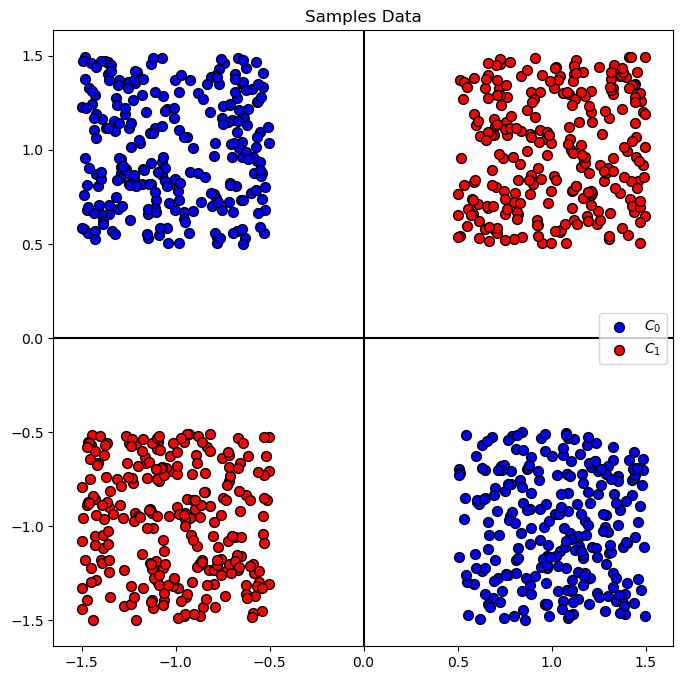

In [8]:
# Plot the Data

hA = PlotBinaryClassData(mX, vY, axisTitle = 'Samples Data')

## Train a Linear SVM Model

* <font color='red'>(**?**)</font> Given the data, what do you expect the best accuracy will be?

In [9]:
# SVM Linear Model

vAcc = np.zeros(shape = len(lC))

for ii, C in enumerate(lC):
    oLinSvc  = SVC(C = C, kernel = kernelType).fit(mX, vY)
    vAcc[ii] = oLinSvc.score(mX, vY)

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oLinSvc = SVC(C = bestC, kernel = kernelType).fit(mX, vY)

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')


The best model with C = 1.00 achieved accuracy of 75.00%


why only 75? svm take to min the dist

dist is not a loss !!!!

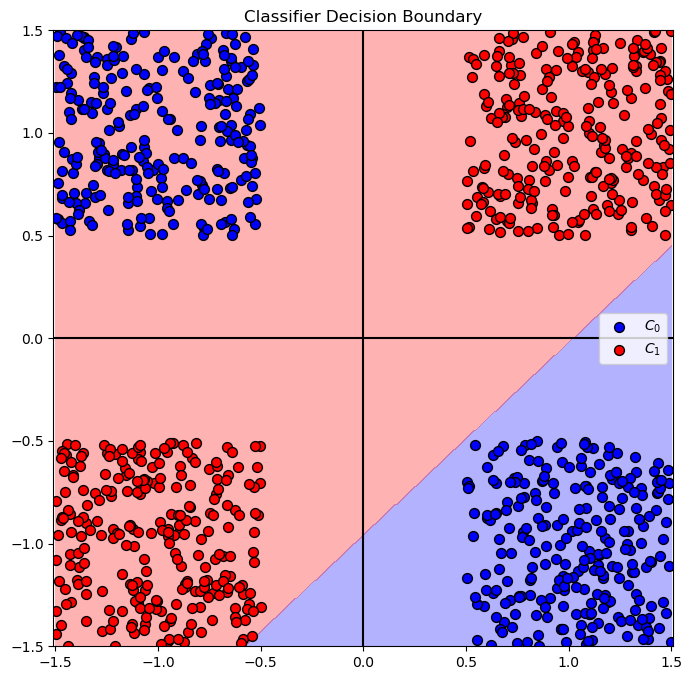

In [10]:
# Plot the Decision Boundary

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oLinSvc.predict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()


## Feature Transform

In this section we'll a new feature: ${x}_{3} = {x}_{1} \cdot {x}_{2}$.

In [11]:
# Generate a set of features with the new feature
mXX = np.column_stack((mX, mX[:, 0] * mX[:, 1]))
print(f'mx shape = {mX.shape}')
print(f'mxx shape = {mXX.shape}')       ### increase the number of features !!!!


mx shape = (1000, 2)
mxx shape = (1000, 3)


## Solution by Linear SVM Classifier

In this section we'll try optimize the best Linear SVM model for the problem.  
Yet, we'll train it on the features with the additional transformed one.

Then we'll show the decision boundary of the best model.

* <font color='red'>(**?**)</font> What do you expect the decision boundary to look like this time?

In [12]:
# SVM Linear Model

vAcc = np.zeros(shape = len(lC))

for ii, C in enumerate(lC):
    oLinSvc  = SVC(C = C, kernel = kernelType).fit(mXX, vY) #<! Pay attention we train on `mXX`
    vAcc[ii] = oLinSvc.score(mXX, vY)

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oLinSvc = SVC(C = bestC, kernel = kernelType).fit(mXX, vY)

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')


The best model with C = 0.10 achieved accuracy of 100.00%


* <font color='red'>(**?**)</font> Why was the above `C` gave the best results?
* <font color='red'>(**?**)</font> What's the accuracy of all other models?

In [13]:
lC

[0.1, 0.25, 0.75, 1, 1.5, 2, 3]

!!! the C is not important here because the data is linearly separable !!!!

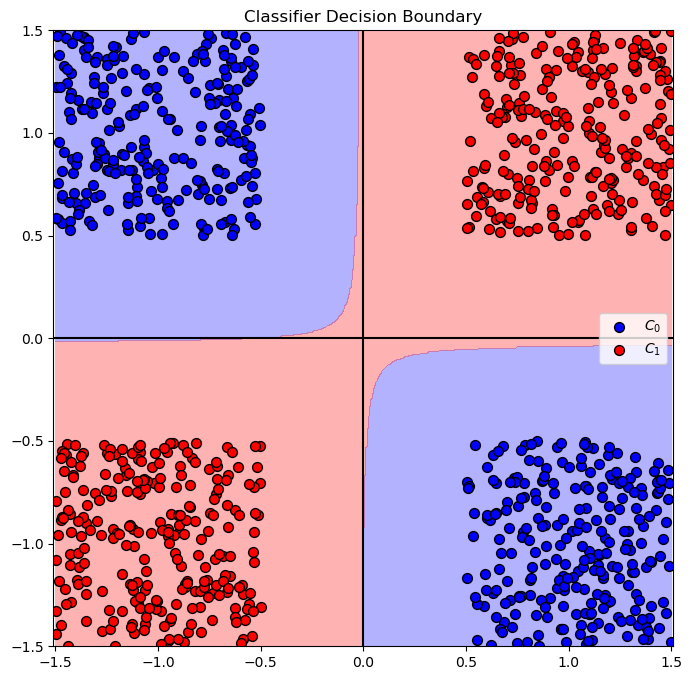

In [14]:
# Plot the Decision Boundary

hPredict = lambda mX: oLinSvc.predict(np.column_stack((mX, mX[:, 0] * mX[:, 1])))

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(hPredict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()

## Solution by Kernel SVM - Polynomial

In this section we'll apply a Kernel SVM with Polynomial kernel.

* <font color='red'>(**?**)</font> What feature transform is needed for this model?
* <font color='red'>(**?**)</font> What's the minimum degree of the polynomial to solve this problem?

In [21]:
# SVM Polynomial Model

pDegree     = 4
kernelType  = 'poly'

vAcc = np.zeros(shape = len(lC))

for ii, C in enumerate(lC):
    oSvc     = SVC(C = C, kernel = kernelType, degree = pDegree).fit(mX, vY)
    vAcc[ii] = oSvc.score(mX, vY)

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oSvc = SVC(C = bestC, kernel = kernelType, degree = pDegree).fit(mX, vY)

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')


The best model with C = 0.10 achieved accuracy of 100.00%


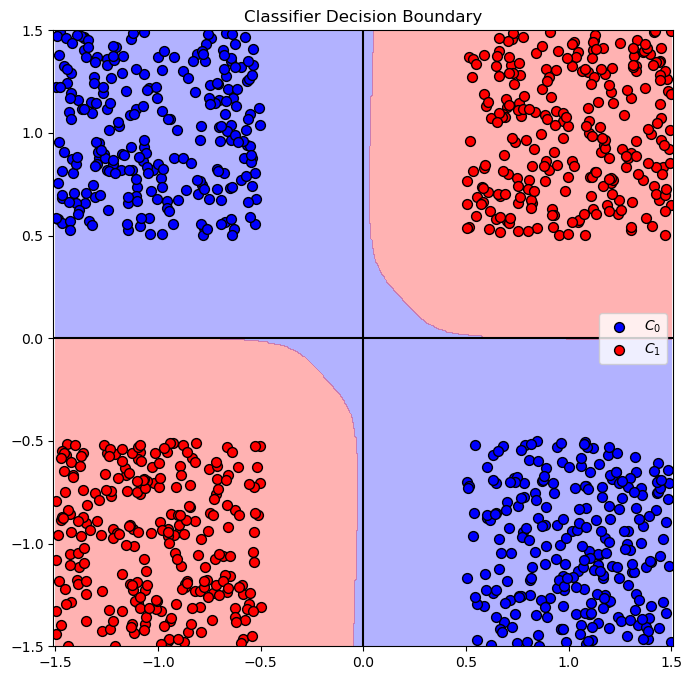

In [22]:
# Plot the Decision Boundary

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oSvc.predict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()

* <font color='green'>(**@**)</font> Do the above with the `rbf` and `sigmoid` kernels.
* <font color='blue'>(**!**)</font> Run the above with the kernel `poly` and set `degree` to 100. What happened?
* <font color='red'>(**?**)</font> How will the complexity of the calculation grow with the polynomial degree? 
* <font color='brown'>(**#**)</font> The issues above are the motivation for the _Kernel Trick_.

# Test with RBF kernel

In [17]:
kernelType  = 'rbf'

vAcc = np.zeros(shape = len(lC))

for ii, C in enumerate(lC):
    oSvc     = SVC(C = C, kernel = kernelType).fit(mX, vY)
    vAcc[ii] = oSvc.score(mX, vY)

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oSvc = SVC(C = bestC, kernel = kernelType, degree = pDegree).fit(mX, vY)

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')

The best model with C = 0.10 achieved accuracy of 100.00%


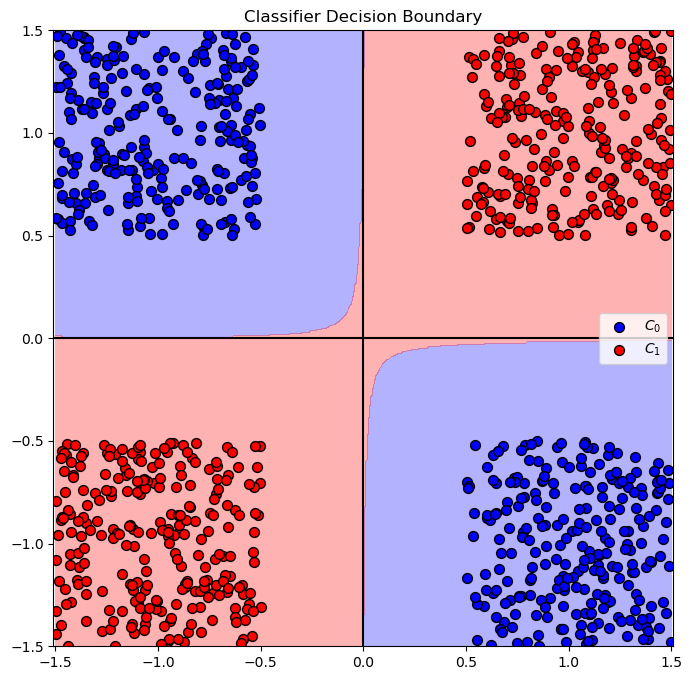

In [18]:
# Plot the Decision Boundary

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oSvc.predict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()

# test with sigmoid

In [23]:
kernelType  = 'sigmoid'

vAcc = np.zeros(shape = len(lC))

for ii, C in enumerate(lC):
    oSvc     = SVC(C = C, kernel = kernelType).fit(mX, vY)
    vAcc[ii] = oSvc.score(mX, vY)

bestModelIdx    = np.argmax(vAcc)
bestC           = lC[bestModelIdx]

oSvc = SVC(C = bestC, kernel = kernelType, degree = pDegree).fit(mX, vY)

print(f'The best model with C = {bestC:0.2f} achieved accuracy of {vAcc[bestModelIdx]:0.2%}')

The best model with C = 0.10 achieved accuracy of 69.00%


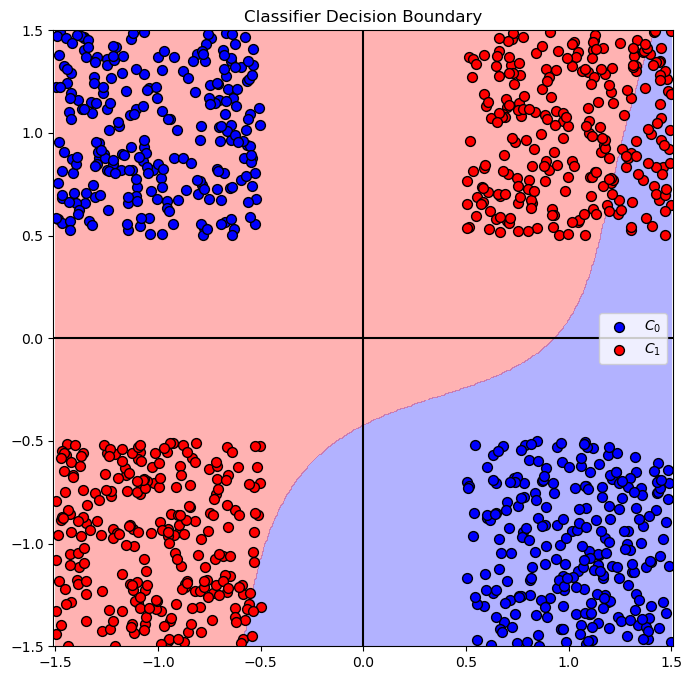

In [24]:
# Plot the Decision Boundary

hF, hA = plt.subplots(figsize = FIG_SIZE_DEF)
hA = PlotDecisionBoundary(oSvc.predict, hA)
hA = PlotBinaryClassData(mX, vY, hA = hA, axisTitle = 'Classifier Decision Boundary')
plt.show()